In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data=pd.read_csv("Dataset_17_feat.csv")
data.head()

,Experimental_index,DP_Group,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,SE,Drug_Mw,Drug_TPSA,Drug_NHA,Drug_LogP,Time,T=0.25,T=0.5,T=1.0,Release
0,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,0.00,0.09,0.19,0.35,0.00
1,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,0.26,0.09,0.19,0.35,0.07
2,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,1.06,0.09,0.19,0.35,0.40
3,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,2.09,0.09,0.19,0.35,0.57
4,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.0,130.08,65.72,5.0,-0.8,3.11,0.09,0.19,0.35,0.69


In [45]:
data=data[data['DP_Group'].str.contains('PLGA')]
data

,Experimental_index,DP_Group,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,SE,Drug_Mw,Drug_TPSA,Drug_NHA,Drug_LogP,Time,T=0.25,T=0.5,T=1.0,Release
0,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,0.00,0.09,0.19,0.35,0.00
1,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,0.26,0.09,0.19,0.35,0.07
2,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,1.06,0.09,0.19,0.35,0.40
3,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,2.09,0.09,0.19,0.35,0.57
4,80,5-FU-PLGA,1.0,104000.0,0.0,282.5,7.76,0.8,0.35,76.73,0.00,130.08,65.72,5.0,-0.80,3.11,0.09,0.19,0.35,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,0.01,325.50,23.47,2.0,5.34,19.86,0.06,0.09,0.15,0.99
3779,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,0.01,325.50,23.47,2.0,5.34,21.88,0.06,0.09,0.15,1.00
3780,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,0.01,325.50,23.47,2.0,5.34,24.16,0.06,0.09,0.15,1.00
3781,89,TTD-PLGA,1.0,8300.0,0.0,206.0,10.28,0.1,0.06,112.25,0.01,325.50,23.47,2.0,5.34,26.19,0.06,0.09,0.15,1.00


In [46]:
df17=data.drop(columns=['Experimental_index', 'DP_Group'])

In [47]:
## separating x and y
x=df17.drop(df17[['Release']], axis=1)
y=df17['Release']

In [48]:
#splitting the data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
x_train,x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
#scaling of the data
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
knn_model=KNeighborsRegressor()
knn_model.fit(x_train_scaled, y_train)
y_pred_train = knn_model.predict(x_train_scaled)
y_pred_test = knn_model.predict(x_test_scaled)

# Calculate R2 score for training and testing sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"R2 score for training set: {r2_train * 100}")
print(f"R2 score for test set: {r2_test * 100}")


R2 score for training set: 93.61263885450542
R2 score for test set: 85.14492414065093


### Hyperparameter tuning

In [10]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_grid = {
    'n_neighbors':[3, 5, 6],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30],
    'p': [1, 2],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

tuned_knn_model=GridSearchCV(estimator=knn_model, param_grid=param_grid, verbose=2)

tuned_knn_model.fit(x_train_scaled, y_train)

tuned_knn_model.best_score_

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf

[CV] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=5, p=1, weights=unifor

[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=5, p=2, weights=unifor

[CV] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=6, p=1, weights=distance

[CV] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=3, p=1, weights=unifor

[CV] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=3, p=2, weights=distance

[CV] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=euclidean, n_neighbors=5, p=2, weights=unifor

[CV] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=6, p=1, weights=unifor

[CV] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=mi

[CV] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=ma

[CV] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=

[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=eu

[CV] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=ma

[CV] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=30, metric=

[CV] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=30, metric=

[CV] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=minkowski, n_neigh

[CV] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neigh

[CV] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neigh

[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbo

[CV] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neigh

[CV] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighb

[CV] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbo

[CV] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=6, p=1, weigh

[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=6, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=6, p=2, weigh

[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=3, p=1, weights

[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=3, p=2, weights

[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=5, p=2, weigh

[CV] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=6, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=6, p=1, weights

[CV] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=6, p=2, weight

0.9176845163904293

In [11]:
tuned_knn_model.best_params_

{'algorithm': 'kd_tree',
 'leaf_size': 10,
 'metric': 'minkowski',
 'n_neighbors': 3,
 'p': 2,
 'weights': 'distance'}

In [49]:
knn_model = KNeighborsRegressor(algorithm= 'kd_tree',
 leaf_size=10,
 metric= 'minkowski',
 n_neighbors= 3,
 p= 2,
 weights= 'distance')

knn_model.fit(x_train_scaled, y_train)
y_pred_train = knn_model.predict(x_train_scaled)
y_pred_test = knn_model.predict(x_test_scaled)

print(f"R2 score for training set: {r2_score(y_train, y_pred_train) * 100}")
print(f"R2 score for test set: {r2_score(y_test, y_pred_test) * 100}")

print(f"MAE for training set: {mean_absolute_error(y_train, y_pred_train)}")
print(f"MAE for test set: {mean_absolute_error(y_test, y_pred_test)}")


R2 score for training set: 99.88189646195471
R2 score for test set: 92.78980643006014
MAE for training set: 0.0011757021554539516
MAE for test set: 0.04896079510793246


#### New data check

In [38]:
x_test.columns

Index(['LA/GA', 'Polymer_MW', 'CL Ratio', 'Drug_Tm', 'Drug_Pka',
       'Initial D/M ratio', 'DLC', 'SA-V', 'SE', 'Drug_Mw', 'Drug_TPSA',
       'Drug_NHA', 'Drug_LogP', 'Time', 'T=0.25', 'T=0.5', 'T=1.0'],
      dtype='object')

In [50]:
#5-FU-PLGA,index-83
new1_data = {
    "LA/GA": [1] * 24,
    "Polymer_MW": [104000] * 24,
    "CL Ratio": [0] * 24,
    "Drug_Tm": [282.5] * 24,
    "Drug_Pka": [7.76] * 24,
    "Initial D/M ratio": [0.8] * 24,
    "DLC":[0.24]*24,
    "SA-V": [152.76] * 24,
    "SE": [0] * 24,
    "Drug_Mw": [130.08] * 24,
    "Drug_TPSA":[65.72]*24,
    "Drug_NHA":[5]*24,
    "Drug_LogP": [-0.8] * 24,
    "Time": [0.00, 0.20, 0.33, 1.11, 2.07, 3.15, 4.11, 4.99, 6.07, 7.08, 8.09, 9.04, 10.12, 11.07, 12.08, 13.09, 14.17, 15.18, 16.06, 17.27, 18.09, 19.17, 20.05, 21.06],
    "T=0.25": [0.09] * 24,
    "T=0.5":[0.16]*24,
    "T=1.0":[0.28]*24
}

df_FU = pd.DataFrame(new1_data)


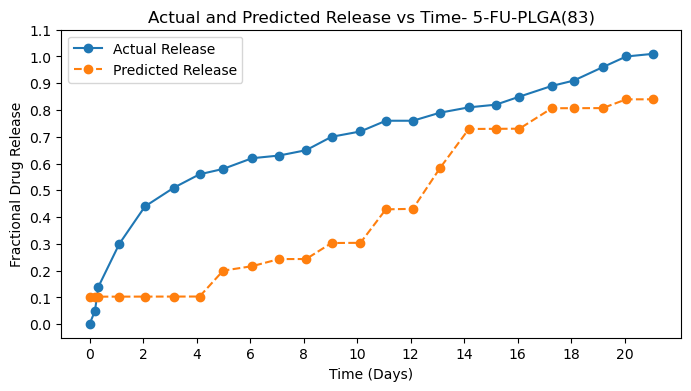

In [40]:
#function to visualize the actual vs predicted over time
def actualVsPredcited(new_data, predicted_release, actual_release, time):
    #DataFrame for actual values
    df_actual = pd.DataFrame({"Actual_Release": actual_release, "Time": time})

    # DataFrame for predicted values
    df_predicted = pd.DataFrame({"Predicted_Release": predicted_release, "Time": time})

    # Plot actual and predicted release values against time
    plt.figure(figsize=(8, 4))
    plt.plot(df_actual["Time"], df_actual["Actual_Release"], marker='o', label='Actual Release')
    plt.plot(df_predicted["Time"], df_predicted["Predicted_Release"], marker='o', linestyle='--', label='Predicted Release')
    plt.xlabel('Time (Days)')
    plt.ylabel('Fractional Drug Release')
    plt.title('Actual and Predicted Release vs Time- 5-FU-PLGA(83)')
    plt.legend()
    plt.xticks(range(0, int(max(time)) + 1, 2))
    plt.yticks([i * 0.1 for i in range(int(max(max(df_actual["Actual_Release"]), max(df_predicted["Predicted_Release"])) * 10) + 2)])
    plt.show()

scaler=StandardScaler()
scaled_df=scaler.fit_transform(df_FU)
predicted_release = knn_model.predict(scaled_df)
actual_release = [0, 0.05, 0.14, 0.3, 0.44, 0.51, 0.56, 0.58, 0.62, 0.63, 0.65, 0.7, 0.72, 0.76, 0.76, 0.79, 0.81, 0.82, 0.85, 0.89, 0.91, 0.96, 1, 1.01]
time = [0.00, 0.20, 0.33, 1.11, 2.07, 3.15, 4.11, 4.99, 6.07, 7.08, 8.09, 9.04, 10.12, 11.07, 12.08, 13.09, 14.17, 15.18, 16.06, 17.27, 18.09, 19.17, 20.05, 21.06]

#calling the function
actualVsPredcited(new1_data, predicted_release, actual_release, time)


### Decision Tree

In [14]:
#splitting the data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
x_train,x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
#scaling of the data
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
dt_model=DecisionTreeRegressor()
dt_model.fit(x_train_scaled, y_train)
y_pred_train = dt_model.predict(x_train_scaled)
y_pred_test = dt_model.predict(x_test_scaled)

# Calculate R2 score for training and testing sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"R2 score for training set: {r2_train * 100}")
print(f"R2 score for test set: {r2_test * 100}")


R2 score for training set: 99.88189646195471
R2 score for test set: 94.93766610045354


### Hyperparameter Tuning

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'max_depth': [None, 5, 10, 15], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['auto', 'sqrt', 'log2'],  
    'random_state': [42] 
}

dt_regressor = DecisionTreeRegressor()

tuned_dt_model = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, verbose=2)

tuned_dt_model.fit(x_train_scaled, y_train)

tuned_dt_model.best_score_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, random_state=42; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, random_state=42; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, random_state=42; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, random_state=42; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, random_state=42; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, random_state=42; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, random_state=42; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, rando

[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, random_state=42; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, random_state=42; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, random_state=42; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, random_state=42; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, random_state=42; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, random_state=42; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, random_state=42; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, random_state=42; total time=   0.0s
[CV] END max_depth=None, max_fea

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, random_state=42; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, random_state=42; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, random_state=42; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, random_state=42; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, random_state=42; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, random_state=42; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, random_state=42; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, random_state=42; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_sample

[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, random_state=42; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, random_state=42; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, random_state=42; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, random_state=42; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, random_state=42; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, random_state=42; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, random_state=42; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, random_state=42; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_sampl

[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, random_state=42; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, random_state=42; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, random_state=42; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, random_state=42; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, random_state=42; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, random_state=42; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, random_state=42; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, random_state=42; total time=   0.0s
[CV] END max_depth=10, max_features=log2, m

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, random_state=42; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, random_state=42; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, random_state=42; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, random_state=42; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, random_state=42; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, random_state=42; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, random_state=42; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, random_state=42; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_sa

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packag

0.9039139544274798

In [20]:
tuned_dt_model.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 42}

In [21]:
dt_model = DecisionTreeRegressor(max_depth= None,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 2,
 random_state= 42)

dt_model.fit(x_train_scaled, y_train)
y_pred_train = dt_model.predict(x_train_scaled)
y_pred_test = dt_model.predict(x_test_scaled)

print(f"R2 score for training set: {r2_score(y_train, y_pred_train) * 100}")
print(f"R2 score for test set: {r2_score(y_test, y_pred_test) * 100}")

print(f"MAE for training set: {mean_absolute_error(y_train, y_pred_train)}")
print(f"MAE for test set: {mean_absolute_error(y_test, y_pred_test)}")


R2 score for training set: 99.88189646195471
R2 score for test set: 93.07912845679134
MAE for training set: 0.0011757021554539516
MAE for test set: 0.055548302872062666


### Gradient Boostin

In [22]:
#splitting the data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
x_train,x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
#scaling of the data
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
gb_model=GradientBoostingRegressor()
gb_model.fit(x_train_scaled, y_train)
y_pred_train = gb_model.predict(x_train_scaled)
y_pred_test = gb_model.predict(x_test_scaled)

# Calculate R2 score for training and testing sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"R2 score for training set: {r2_train * 100}")
print(f"R2 score for test set: {r2_test * 100}")


R2 score for training set: 94.1565632905041
R2 score for test set: 91.91450875464258


### Hyperparameter tuning

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.05, 0.1, 0.2], 
    'max_depth': [3, 4, 5],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['auto', 'sqrt', 'log2'],  
    'subsample': [0.8, 0.9, 1.0],  
    'random_state': [42]  
}

gb_regressor = GradientBoostingRegressor()

tuned_gb_model = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, verbose=2)

tuned_gb_model.fit(x_train_scaled, y_train)

tuned_gb_model.best_score_


Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=1, min

[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsam

[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9;

[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8

[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, su

[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, su

[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9;

[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0;

[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsam

[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, su

[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200, random_state=42, su

[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subs

[CV] END learning_rate=0.05, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsam

[CV] END learning_rate=0.05, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8

[CV] END learning_rate=0.05, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9;

[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8

[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, su

[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, su

[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, su

[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=

[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9;

[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0;

[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsam

[CV] END learning_rate=0.05, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsam

[CV] END learning_rate=0.05, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9;

[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9;

[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.

[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, su

[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, su

[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, su

[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsampl

[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9;

[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0;

[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsam

[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8;

[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; tot

[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; tot

[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9;

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; to

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsampl

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0;

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0;

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, random_state=42, subsampl

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9;

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0;

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0;

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; 

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsampl

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0;

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8;

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsampl

[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0;

[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9;

[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8;

[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; to

[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8;

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9; total

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0;

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; t

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9;

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsampl

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8;

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9;

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsampl

[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0;

[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8;

[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9; total

[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total

[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.

[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9;

[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9;

[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsampl

[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9;

[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsampl

[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; to

[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total

[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; 

[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9; total

[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total

[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0;

[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; to

[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9;

[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsampl

[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0;

[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8;

[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsampl

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0;

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8;

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; tot

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0;

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; t

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9;

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsampl

[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, subsampl

[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9;

[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total

[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9; total

[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total

[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.8

[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9;

[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9;

[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsampl

[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8;

[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9;

[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsampl

[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0;

[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8;

[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9; total

[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total

[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=

[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9;

[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0;

[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsampl

[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42, subsampl

[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9;

[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9;

[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.

[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total

[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0;

[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; to

[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9;

[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsampl

[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0;

[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8;

[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsampl

[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0;

[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8;

[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; tot

[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total

[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0;

[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; t

[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9;

[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsampl

[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0;

[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8;

[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9; total

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0;

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; t

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9;

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42, subsampl

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.8;

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.9;

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, subsampl

[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42, subsample=1.0;

[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.8;

[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42, subsample=0.9; total

[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42, subsample=1.0; total

[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=42, subsample=1.0;

[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, random_state=42, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8; t

[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=42, subsample=0.9;

[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsampl

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3645 fits failed out of a total of 10935.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3645 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-pa

0.9712666165313646

In [24]:
tuned_gb_model.best_params_

{'learning_rate': 0.2,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200,
 'random_state': 42,
 'subsample': 0.8}

In [41]:
gb_model=GradientBoostingRegressor(learning_rate= 0.2,
 max_depth= 5,
 max_features= 'sqrt',
 min_samples_leaf= 2,
 min_samples_split= 2,
 n_estimators= 200,
 random_state= 42,
 subsample= 0.8)

gb_model.fit(x_train_scaled, y_train)
y_pred_train = gb_model.predict(x_train_scaled)
y_pred_test = gb_model.predict(x_test_scaled)

# Calculate R2 score for training and testing sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"R2 score for training set: {r2_train * 100}")
print(f"R2 score for test set: {r2_test * 100}")

R2 score for training set: 99.49299186757723
R2 score for test set: 97.88933207381544


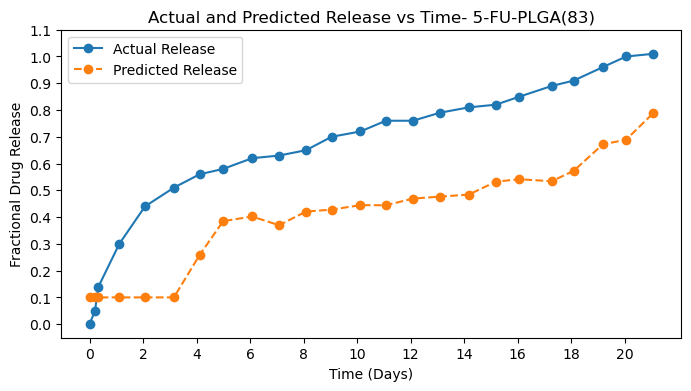

In [42]:
#5-FU-PLGA,index-83
new1_data = {
    "LA/GA": [1] * 24,
    "Polymer_MW": [104000] * 24,
    "CL Ratio": [0] * 24,
    "Drug_Tm": [282.5] * 24,
    "Drug_Pka": [7.76] * 24,
    "Initial D/M ratio": [0.8] * 24,
    "DLC":[0.24]*24,
    "SA-V": [152.76] * 24,
    "SE": [0] * 24,
    "Drug_Mw": [130.08] * 24,
    "Drug_TPSA":[65.72]*24,
    "Drug_NHA":[5]*24,
    "Drug_LogP": [-0.8] * 24,
    "Time": [0.00, 0.20, 0.33, 1.11, 2.07, 3.15, 4.11, 4.99, 6.07, 7.08, 8.09, 9.04, 10.12, 11.07, 12.08, 13.09, 14.17, 15.18, 16.06, 17.27, 18.09, 19.17, 20.05, 21.06],
    "T=0.25": [0.09] * 24,
    "T=0.5":[0.16]*24,
    "T=1.0":[0.28]*24
}

df_FU = pd.DataFrame(new1_data)


#function to visualize the actual vs predicted over time
def actualVsPredcited(new_data, predicted_release, actual_release, time):
    #DataFrame for actual values
    df_actual = pd.DataFrame({"Actual_Release": actual_release, "Time": time})

    # DataFrame for predicted values
    df_predicted = pd.DataFrame({"Predicted_Release": predicted_release, "Time": time})

    # Plot actual and predicted release values against time
    plt.figure(figsize=(8, 4))
    plt.plot(df_actual["Time"], df_actual["Actual_Release"], marker='o', label='Actual Release')
    plt.plot(df_predicted["Time"], df_predicted["Predicted_Release"], marker='o', linestyle='--', label='Predicted Release')
    plt.xlabel('Time (Days)')
    plt.ylabel('Fractional Drug Release')
    plt.title('Actual and Predicted Release vs Time- 5-FU-PLGA(83)')
    plt.legend()
    plt.xticks(range(0, int(max(time)) + 1, 2))
    plt.yticks([i * 0.1 for i in range(int(max(max(df_actual["Actual_Release"]), max(df_predicted["Predicted_Release"])) * 10) + 2)])
    plt.show()

scaler=StandardScaler()
scaled_df=scaler.fit_transform(df_FU)
predicted_release = gb_model.predict(scaled_df)
actual_release = [0, 0.05, 0.14, 0.3, 0.44, 0.51, 0.56, 0.58, 0.62, 0.63, 0.65, 0.7, 0.72, 0.76, 0.76, 0.79, 0.81, 0.82, 0.85, 0.89, 0.91, 0.96, 1, 1.01]
time = [0.00, 0.20, 0.33, 1.11, 2.07, 3.15, 4.11, 4.99, 6.07, 7.08, 8.09, 9.04, 10.12, 11.07, 12.08, 13.09, 14.17, 15.18, 16.06, 17.27, 18.09, 19.17, 20.05, 21.06]

#calling the function
actualVsPredcited(new1_data, predicted_release, actual_release, time)

